In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook
from scipy.integrate import solve_ivp
from scipy.optimize import fsolve
import warnings 
warnings.filterwarnings('ignore')

In [2]:
def bvp(t,Y,a,b,c,i):
    x = Y[0]
    y = Y[1]
    xdot = c*(y + x - x**3/3 + i)
    ydot = -(x - a + b*y)/c
#     print(xdot)
    return np.array([xdot,ydot])

def func(X,a,b,i):
    x = X[0]
    return [b*x**3/3+x*(1-b)-(a+b*i)]

def dist(x1,y1,x2,y2):
    return np.sqrt((x2-x1)**2 + (y2-y1)**2)

def null(t,Y,a,b,c,i):
    xn = fsolve(func, [-5], args = (a,b,i))
    yn = (xn-a)/-b
    return dist(xn,yn,Y[0],Y[1])-0.01
null.terminal = True
null.direction = -1

def null2(t,Y,a,b,c,i):
    return abs(Y[0])-10
null2.terminal = True
# null.direction = -1

In [3]:
def xnull(x, i):
    return -x + x**3/3 - i

def ynull(x,a,b):
    return (x-a)/-b

<IPython.core.display.Javascript object>


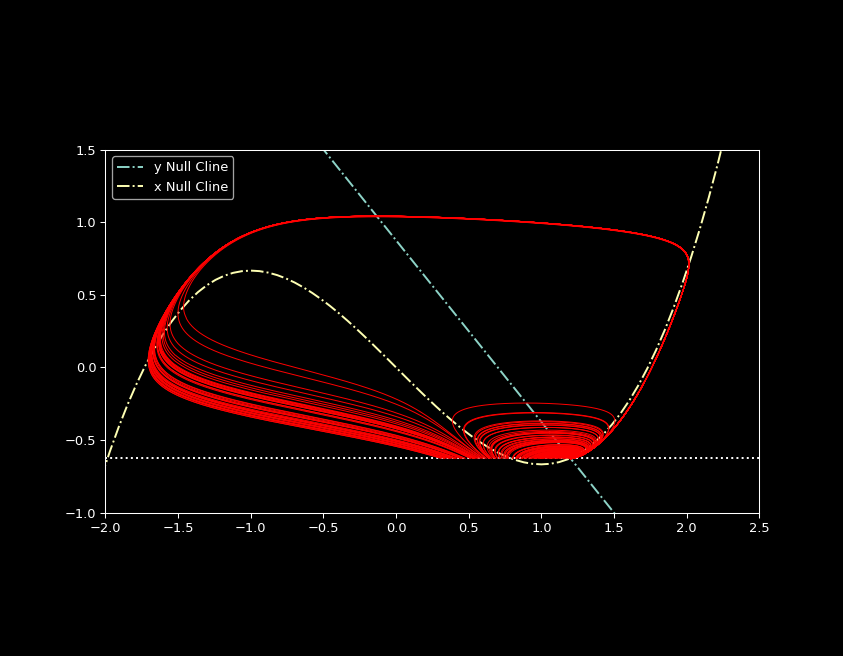

Wall time: 918 ms


In [9]:
%%time

xnx = np.linspace(-3,3,100)


# zs = [0.4,-0.4,0,-0.124,-0.128]

z = 0

plt.figure(figsize = (9,7))
plt.style.use('dark_background')
plt.xlim(-2,2.5);
plt.ylim(-1,1.5)
plt.gca().set_aspect('equal')
plt.style.use('dark_background')

plt.plot(xnx,ynull(xnx,0.7,0.8),'-.',label = "y Null Cline")
plt.plot(xnx,xnull(xnx,z),'-.',label = "x Null Cline")
xn = fsolve(func, [-5], args = (0.7,0.8,z))[0]
yn = ynull(xn,0.7,0.8)
plt.axhline(yn,ls =':')

np.random.seed(20)
x0 = np.random.uniform(0.3,xn,150)
# x0 = 
# x0 = np.ones(50)*0.85795649
y0 = yn*np.ones(150)

for i in range(len(x0)):
#     phase = solve_ivp(bvp,(0,-10),np.array([x0[i],y0[i]]),t_eval = np.linspace(0,-10,10000),args=(0.7,0.8,3,z),method = 'LSODA',events = null2)
#     plt.plot(phase.y[0],phase.y[1],'r',linewidth=0.75);
#     for j in range(len(phase.y[0])):
#         if j%500==0 and j!=5000 and j!=500 and j!=0:
#             plt.arrow(phase.y[0][j],phase.y[1][j], -phase.y[0][1+j]+phase.y[0][j], phase.y[1][j+1]-phase.y[1][j], shape='full', lw=0, length_includes_head=True, head_width=.03,fc='yellow')
    phase = solve_ivp(bvp,(0,+10),np.array([x0[i],y0[i]]),t_eval = np.linspace(0,+10,10000),args=(0.7,0.8,3,z),method = 'LSODA',events = null2)
    plt.plot(phase.y[0],phase.y[1],'r',linewidth=0.75);
#     for j in range(len(phase.y[0])):
#         if j%300==0 and j!=0:
#             plt.arrow(phase.y[0][j],phase.y[1][j], phase.y[0][1+j]-phase.y[0][j], phase.y[1][j+1]-phase.y[1][j], shape='full', lw=0, length_includes_head=True, head_width=.04,fc='yellow')
plt.legend()
# plt.title('z = {}'.format(z))
# plt.savefig('z = {}_2.png'.format(z))

<IPython.core.display.Javascript object>


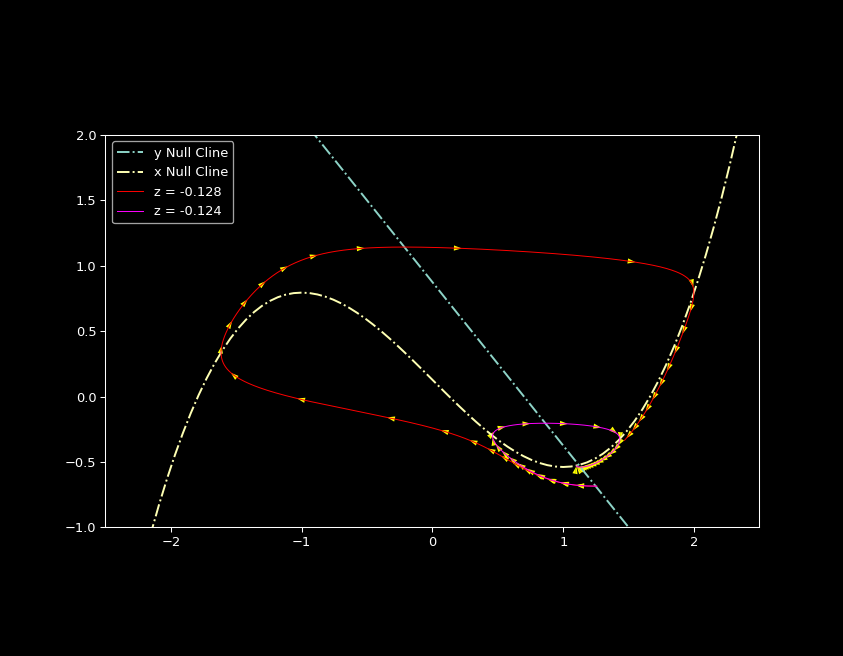

Wall time: 168 ms


In [10]:
%%time

xnx = np.linspace(-3,3,100)


# zs = [0.4,-0.4,0,-0.124,-0.128]

z = -0.128

plt.figure(figsize = (9,7))
plt.style.use('dark_background')
plt.xlim(-2.5,2.5);
plt.ylim(-1,2);
plt.gca().set_aspect('equal')
plt.style.use('dark_background')

np.random.seed(2540)
# x0 = np.random.uniform(-2.5,2.5,100)
# x0 = np.ones(50)*0.85795649
# y0 = np.random.uniform(-2,2,100)
xn = fsolve(func, [-5], args = (0.7,0.8,0.1))[0]
yn = ynull(xn,0.7,0.8)
x0 = [xn]
y0 = [yn+0.01]

plt.plot(xnx,ynull(xnx,0.7,0.8),'-.',label = "y Null Cline")
plt.plot(xnx,xnull(xnx,z),'-.',label = "x Null Cline")
# xn = fsolve(func, [-5], args = (0.7,0.8,z))[0]
# yn = ynull(xn,0.7,0.8)
# plt.axhline(yn)

for i in range(len(x0)):
#     phase = solve_ivp(bvp,(0,-10),np.array([x0[i],y0[i]]),t_eval = np.linspace(0,-10,10000),args=(0.7,0.8,3,z),method = 'LSODA',events = null2)
#     plt.plot(phase.y[0],phase.y[1],'r',linewidth=0.75);
#     for j in range(len(phase.y[0])):
#         if j%500==0 and j!=5000 and j!=500 and j!=0:
#             plt.arrow(phase.y[0][j],phase.y[1][j], -phase.y[0][1+j]+phase.y[0][j], phase.y[1][j+1]-phase.y[1][j], shape='full', lw=0, length_includes_head=True, head_width=.03,fc='yellow')
    phase = solve_ivp(bvp,(0,+10),np.array([x0[i],y0[i]]),t_eval = np.linspace(0,+10,10000),args=(0.7,0.8,3,z),method = 'LSODA',events = null2)
    plt.plot(phase.y[0],phase.y[1],'r',linewidth=0.75, label = 'z = {}'.format(z));
    for j in range(len(phase.y[0])):
        if j%300==0 and j!=0:
            plt.arrow(phase.y[0][j],phase.y[1][j], phase.y[0][1+j]-phase.y[0][j], phase.y[1][j+1]-phase.y[1][j], shape='full', lw=0, length_includes_head=True, head_width=.04,fc='yellow')

z = -0.124
            
for i in range(len(x0)):
#     phase = solve_ivp(bvp,(0,-10),np.array([x0[i],y0[i]]),t_eval = np.linspace(0,-10,10000),args=(0.7,0.8,3,z),method = 'LSODA',events = null2)
#     plt.plot(phase.y[0],phase.y[1],'r',linewidth=0.75);
#     for j in range(len(phase.y[0])):
#         if j%500==0 and j!=5000 and j!=500 and j!=0:
#             plt.arrow(phase.y[0][j],phase.y[1][j], -phase.y[0][1+j]+phase.y[0][j], phase.y[1][j+1]-phase.y[1][j], shape='full', lw=0, length_includes_head=True, head_width=.03,fc='yellow')
    phase = solve_ivp(bvp,(0,+10),np.array([x0[i],y0[i]]),t_eval = np.linspace(0,+10,10000),args=(0.7,0.8,3,z),method = 'LSODA',events = null2)
    plt.plot(phase.y[0],phase.y[1],'magenta',linewidth=0.75, label = 'z = {}'.format(z));
    for j in range(len(phase.y[0])):
        if j%300==0 and j!=0:
            plt.arrow(phase.y[0][j],phase.y[1][j], phase.y[0][1+j]-phase.y[0][j], phase.y[1][j+1]-phase.y[1][j], shape='full', lw=0, length_includes_head=True, head_width=.04,fc='yellow')
plt.legend()
plt.savefig('z.png')#.format(z))
# plt.savefig('z = {}_2.png'.format(z))

<IPython.core.display.Javascript object>


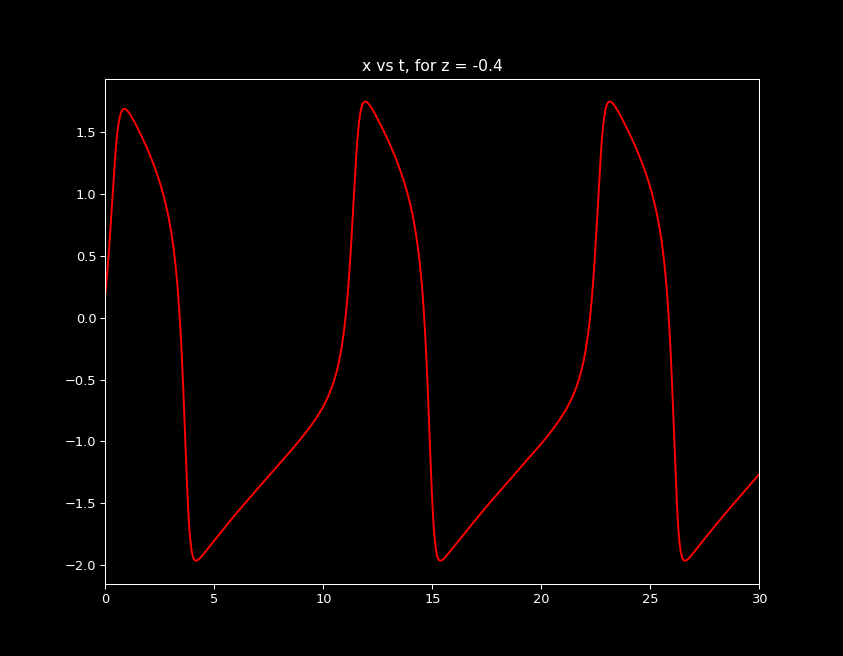

In [12]:
import warnings 
warnings.filterwarnings('ignore')
xnx = np.linspace(-2,2,100)
plt.figure(figsize = (9,7))
plt.style.use('dark_background')
plt.xlim(0,30);
# plt.ylim(-2,2);
# plt.gca().set_aspect('equal')

z = -0.4

x0 = [-0.2]#np.random.uniform(-2,2,1)
y0 = [0]#np.random.uniform(-1,2,1)



# plt.plot(xnx,ynull(xnx,0.7,0.8),'-.',label = "y Null Cline")
# plt.plot(xnx,xnull(xnx,0),'-.',label = "x Null Cline")
for i in range(len(x0)):
#     phase = solve_ivp(bvp,(0,-100),np.array([x0[i],y0[i]]),t_eval = np.linspace(0,-100,10000),args=(0.7,0.8,3,-0.4),method = 'DOP853',events=null)
#     plt.plot(phase.t,phase.y[0],'r',linewidth=0.5);
    phase = solve_ivp(bvp,(0,+100),np.array([x0[i],y0[i]]),t_eval = np.linspace(0,+100,10000),args=(0.7,0.8,3,z),method = 'LSODA')
    plt.plot(phase.t,-phase.y[0],'r',linewidth=1.5);
plt.title("x vs t, for z = {}".format(z) )
plt.savefig("x vs t, for z = {}.png".format(z))
# plt.savefig("vanderpol.png")